# In Search of Normal

In [16]:
import numpy as np
import pandas as pd

import datetime as dt
import yfinance as yf

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

jtplot.style(figsize=(15, 9))

In [2]:
raw_data = pd.read_csv('../../data/bt/GLD_GDX_AAPL_SPY__1D.csv',  parse_dates=True, index_col=0, header=[0, 1])
raw_data.head()

Close                                        High             \
                AAPL        GDX         GLD        SPY      AAPL        GDX   
Date                                                                          
2010-01-04  6.454506  42.180367  109.800003  86.315994  6.469285  42.657781   
2010-01-05  6.465666  42.587044  109.699997  86.544495  6.502159  43.037936   
2010-01-06  6.362820  43.621445  111.510002  86.605408  6.491301  44.266837   
2010-01-07  6.351058  43.409264  110.820000  86.971016  6.393886  43.647971   
2010-01-08  6.393282  44.063499  111.370003  87.260422  6.393886  44.063499   

                                        Low                                    \
                   GLD        SPY      AAPL        GDX         GLD        SPY   
Date                                                                            
2010-01-04  110.139999  86.361690  6.405346  42.047754  109.309998  84.929820   
2010-01-05  110.389999  86.582579  6.431585  41.941652  109.260002  85.950421   
2010-01-06  111.769997  86.818664  6.356185  43.064461  110.410004  86.392151   
2010-01-07  111.290001  87.077644  6.304914  42.923010  110.620003  86.201764   
2010-01-08  111.580002  87.298506  6.305216  42.993740  110.260002  86.567338   

                Open                                       Volume            \
                AAPL        GDX         GLD        SPY       AAPL       GDX   
Date                                                                          
2010-01-04  6.437014  42.242253  109.820000  85.584826  493729600  12508700   
2010-01-05  6.472301  42.410227  109.879997  86.262694  601904800  13787800   
2010-01-06  6.465665  43.250121  110.709999  86.460695  552160000  19322600   
2010-01-07  6.386345  43.621449  111.070000  86.445486  477131200  13312000   
2010-01-08  6.342613  43.771745  111.519997  86.742510  447610800  10719800   

                                 
                 GLD        SPY  
Date                             
2010-01-04  16224100  118944600  
2010-01-05  14213100  111579900  
2010-01-06  24981900  116074400  
2010-01-07  13609800  131091100  
2010-01-08  15894600  126402800

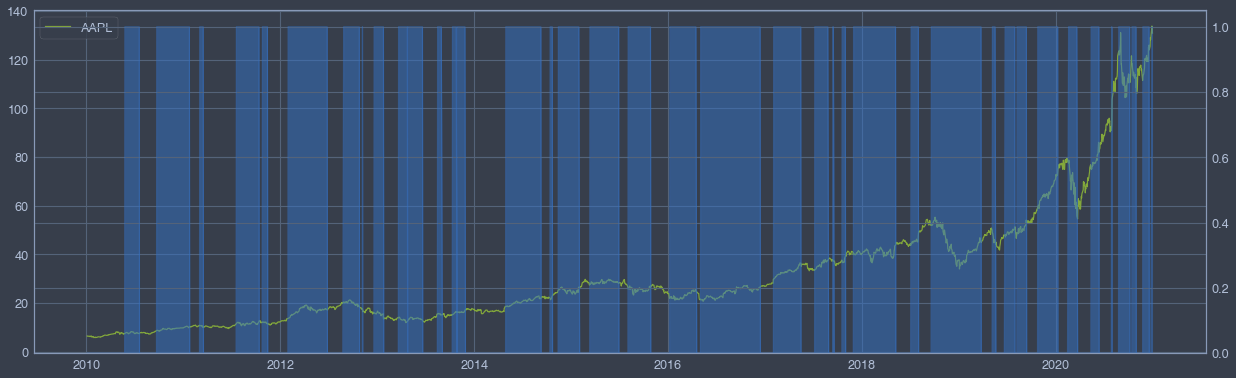

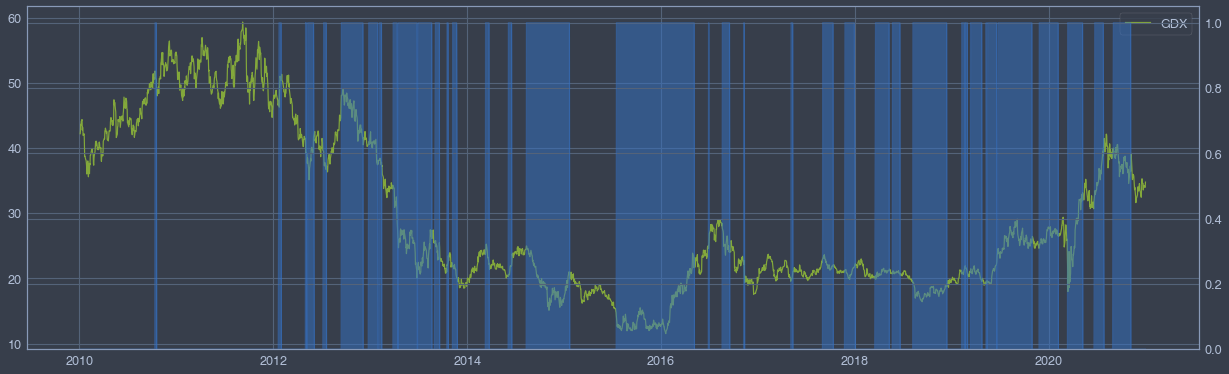

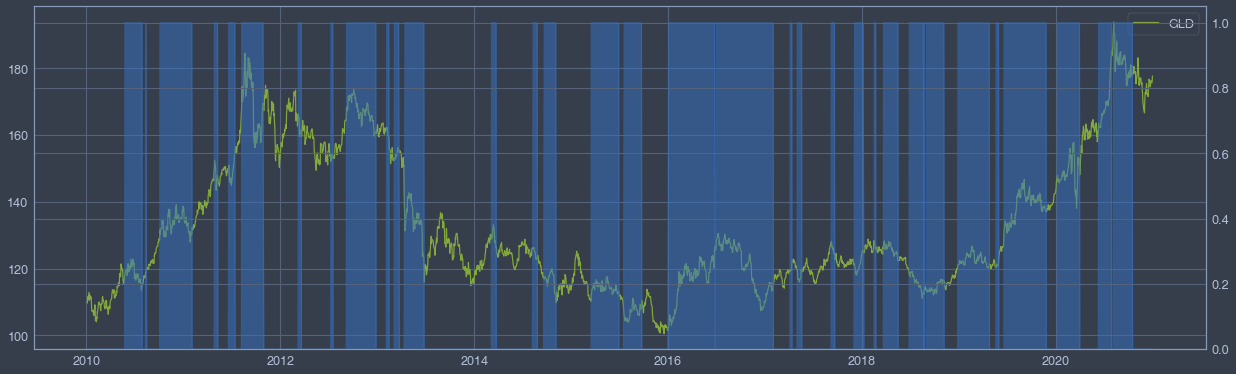

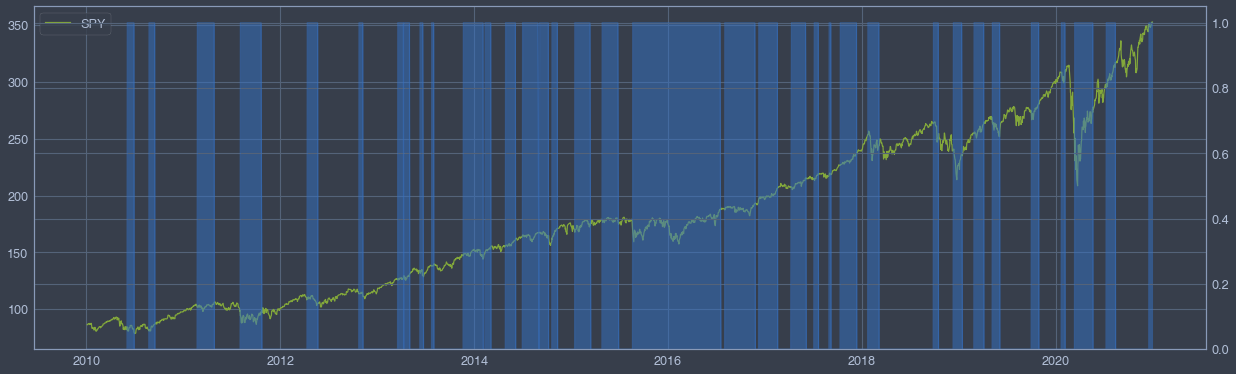

In [15]:
tickers = {}
normal = lambda sl: stats.jarque_bera(sl).pvalue<0.05
for ticker in raw_data.columns.levels[1]:
    tickers[ticker] = raw_data['Close'][ticker].copy().to_frame()
    tickers[ticker].columns = ['price']
    tickers[ticker]['Normal'] = tickers[ticker].rolling(100).apply(normal)
    
    fig, ax = plt.subplots(1, figsize=(21, 7))
    ax.plot(tickers[ticker]['price'], c='g', label=ticker)
    ax_ = ax.twinx()
    tickers[ticker]['Normal'].plot(kind='area', ax=ax_, color=['b'], alpha=0.5, label='Normal')
    ax.legend()

In [3]:
aapl = raw_data['Close']['AAPL'].copy().to_frame()
aapl.columns = ['price']
aapl.head()

,price
Date,
2010-01-04,6.454506
2010-01-05,6.465666
2010-01-06,6.362820
2010-01-07,6.351058
2010-01-08,6.393282


In [11]:
aapl.shape

(2768, 1)

In [19]:
normal = lambda sl: stats.jarque_bera(sl).pvalue<0.05
aapl['Normal'] = aapl['price'].rolling(100).apply(normal)
aapl.tail()

,price,Normal
Date,,
2020-12-23,128.200821,0.0
2020-12-24,129.189514,0.0
2020-12-28,133.810043,1.0
2020-12-29,132.028412,1.0
2020-12-30,130.902634,1.0


<AxesSubplot:label='0cafc942-8f3b-4110-b1c7-80f285fbab10', xlabel='Date'>

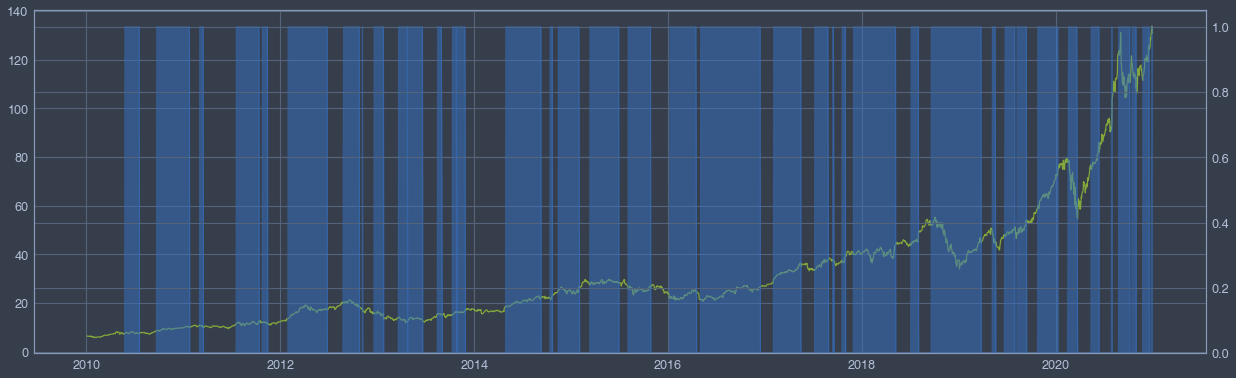

In [35]:
fig, ax = plt.subplots(1, figsize=(21, 7))
ax.plot(aapl['price'], c='g')
ax_ = ax.twinx()
aapl['Normal'].plot(kind='area', ax=ax_, color=['b'], alpha=0.5, label='Normal')